In [13]:
import pandas as pd

# For DuckDuckGo
data_duckduckgo = {
    'Model': ['LR', 'DT', 'RF', 'GB', 'SVM', 'NN', 'K-NN'],
    'F1-Score (macro avg)': [0.77, 0.70, 0.79, 0.79, 0.78, 0.75, 0.75],
    'Hamming Loss': [0.0834, 0.118, 0.076, 0.0767, 0.078, 0.096, 0.089],
    'Jaccard Score': [0.8058, 0.690, 0.820, 0.82, 0.819, 0.758, 0.798]
}

# Create DataFrame
df_duckduckgo = pd.DataFrame(data_duckduckgo)

# For DuckDuckGo_2
data_duckduckgo_2 = {
    'Model': ['LR', 'DT', 'RF', 'GB', 'SVM', 'NN', 'K-NN'],
    'F1-Score (macro avg)': [0.78, 0.68, 0.79, 0.80, 0.79, 0.75, 0.75],
    'Hamming Loss': [0.107, 0.154, 0.099, 0.098, 0.101, 0.121, 0.119],
    'Jaccard Score': [0.769, 0.628, 0.776, 0.788, 0.78, 0.716, 0.752]
}
df_duckduckgo_2 = pd.DataFrame(data_duckduckgo_2)

# For Google
data_google = {
    'Model': ['LR', 'DT', 'RF', 'GB', 'SVM', 'NN', 'K-NN'],
    'F1-Score (macro avg)': [0.82, 0.73, 0.84, 0.83, 0.84, 0.79, 0.80],
    'Hamming Loss': [0.075, 0.112, 0.068, 0.071, 0.069, 0.089, 0.080],
    'Jaccard Score': [0.809, 0.695, 0.827, 0.828, 0.826, 0.769, 0.809]
}
df_google = pd.DataFrame(data_google)

# For Google_2
data_google_2 = {
    'Model': ['LR', 'DT', 'RF', 'GB', 'SVM', 'NN', 'K-NN'],
    'F1-Score (macro avg)': [0.83, 0.73, 0.84, 0.84, 0.83, 0.80, 0.79],
    'Hamming Loss': [0.065, 0.101, 0.059, 0.061, 0.061, 0.075, 0.075],
    'Jaccard Score': [0.848, 0.736, 0.856, 0.855, 0.855, 0.810, 0.834]
}
df_google_2 = pd.DataFrame(data_google_2)

# For Multi Dataset
data_multi = {
    'Model': ['LR', 'DT', 'RF', 'GB', 'SVM', 'NN', 'K-NN'],
    'F1-Score (macro avg)': [0.81, 0.72, 0.83, 0.83, 0.82, 0.77, 0.79],
    'Hamming Loss': [0.101, 0.151, 0.092, 0.093, 0.095, 0.117, 0.113],
    'Jaccard Score': [0.768, 0.616, 0.781, 0.787, 0.779, 0.716, 0.751]
}
df_multi = pd.DataFrame(data_multi)


print(df_duckduckgo)


  Model  F1-Score (macro avg)  Hamming Loss  Jaccard Score
0    LR                  0.77        0.0834         0.8058
1    DT                  0.70        0.1180         0.6900
2    RF                  0.79        0.0760         0.8200
3    GB                  0.79        0.0767         0.8200
4   SVM                  0.78        0.0780         0.8190
5    NN                  0.75        0.0960         0.7580
6  K-NN                  0.75        0.0890         0.7980


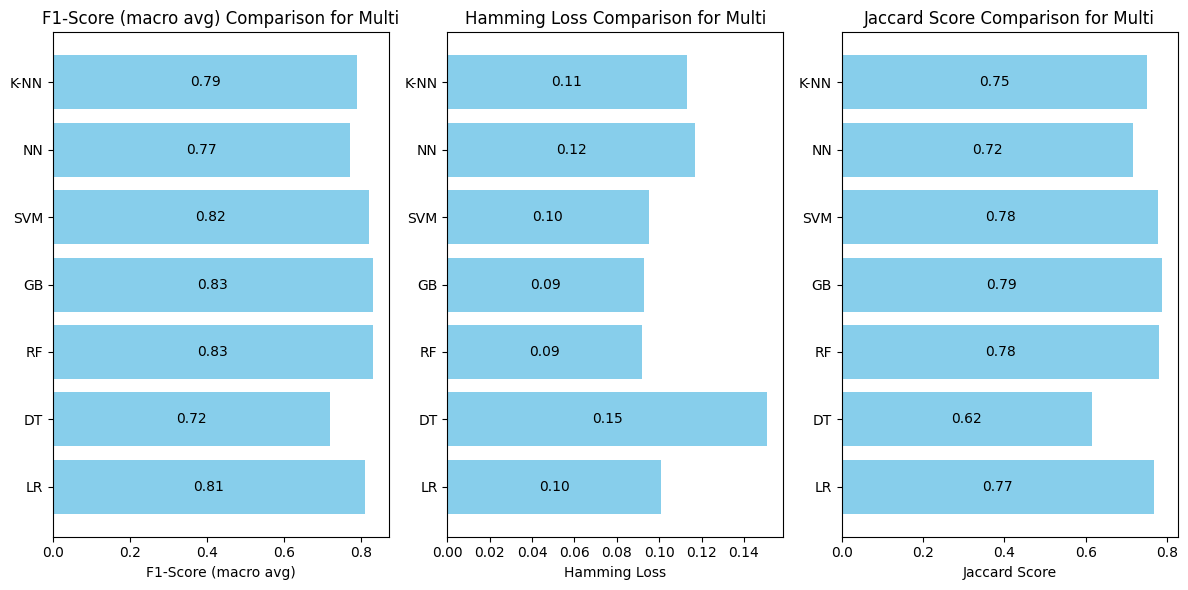

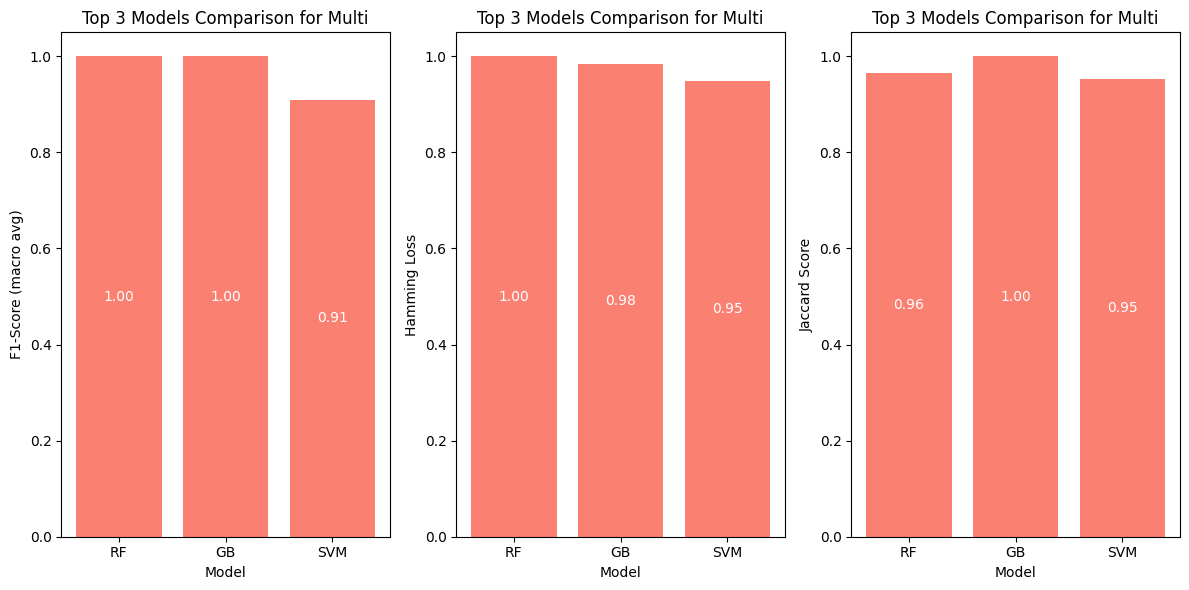

In [48]:
import matplotlib.pyplot as plt

# Normalize metrics
def normalize_metrics(df, metrics_to_maximize, metrics_to_minimize):
    # Normalize metrics where higher is better
    for metric in metrics_to_maximize:
        df[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
    
    # Normalize metrics where lower is better
    for metric in metrics_to_minimize:
        df[metric] = (df[metric].max() - df[metric]) / (df[metric].max() - df[metric].min())
    
    return df

# Function to plot metrics comparison for all models
def plot_metrics_comparison_all(df, dataset_name):
    plt.figure(figsize=(12, 6))
    metrics = df.columns[1:]
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        bars = plt.barh(df['Model'], df[metric], color='skyblue')
        plt.xlabel(metric)
        plt.title(f'{metric} Comparison for {dataset_name}')
        for bar in bars:
            width = bar.get_width()
            plt.text(width / 2, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='center', va='center')
    plt.tight_layout()
    plt.savefig(f'{dataset_name}_metrics_comparison_all.jpg')
    plt.show()

# Function to plot metrics comparison for top 3 models
def plot_metrics_comparison_top3(df, dataset_name):
    df_normalized = normalize_metrics(df.copy(), ['F1-Score (macro avg)', 'Jaccard Score'], ['Hamming Loss'])
    df_top_models = df_normalized.nlargest(3, 'F1-Score (macro avg)')
    plt.figure(figsize=(12, 6))
    metrics = df.columns[1:]
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        bars = plt.bar(df_top_models['Model'], df_top_models[metric], color='salmon')
        plt.xlabel('Model')
        plt.ylabel(metric)
        plt.title(f'Top 3 Models Comparison for {dataset_name}')
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{height:.2f}', ha='center', va='center', color='white')
    plt.tight_layout()
    plt.savefig(f'{dataset_name}_top_models_comparison.jpg')
    plt.show()

# Plotting metrics comparison for all models
plot_metrics_comparison_all(df_multi, 'Multi')

# Plotting metrics comparison for top 3 models
plot_metrics_comparison_top3(df_multi, 'Multi')
